In [ ]:
"""
Purpose: To be able and validate when a 
branch splits off into 2 branches and 
whether or not this is valid


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-06-28 17:14:50,288 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-28 17:14:50,290 - settings - Setting database.user to celiib
INFO - 2021-06-28 17:14:50,291 - settings - Setting database.password to newceliipass
INFO - 2021-06-28 17:14:50,292 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-28 17:14:50,293 - settings - Setting database.user to celiib
INFO - 2021-06-28 17:14:50,294 - settings - Setting database.password to newceliipass
INFO - 2021-06-28 17:14:50,422 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-28 17:14:51,085 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-28 17:14:51,142 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-28 17:14:51,143 - settings - Setting database.user to celiib
INFO - 2021-06-28 17:14:51,144 - settings - Setting database.password to newceliipass
INFO - 2021-06-28 17:14:51,145 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-28 17:14:51,834 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-28 17:14:51,879 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-28 17:14:51,880 - settings - Setting database.user to celiib
INFO - 2021-06-28 17:14:51,881 - settings - Setting database.password to newceliipass
INFO - 2021-06-28 17:14:51,882 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-28 17:14:51,882 - settings - Setting database.user to celiib
INFO - 2021-06-28 17:14:51,883 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-28 17:14:52,788 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-28 17:14:52,790 - settings - Setting database.user to celiib
INFO - 2021-06-28 17:14:52,791 - settings - Setting database.password to newceliipass
INFO - 2021-06-28 17:14:52,792 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-28 17:14:53,583 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Pulling Down a Neuron

In [10]:
segment_id = 864691135212632448

In [5]:
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Number of Neurons found = 1


In [11]:
minnie.DecompositionCellType()& dict(segment_id=segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,allen_e_i,allen_e_i_n_nuc,allen_cell_type,allen_cell_type_n_nuc,allen_cell_type_e_i,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,cell_type_for_axon,axon_volume volume of the oriented bounding box of axon (divided by 10^14),axon_length length (in um) of the classified axon skeleton,axon_branch_length_median length (in um) of the classified axon skeleton,axon_branch_length_mean length (in um) of the classified axon skeleton,axon_n_branches,axon_n_short_branches,axon_n_long_branches,axon_n_medium_branches,axon_bbox_x_min,axon_bbox_y_min,axon_bbox_z_min,axon_bbox_x_max,axon_bbox_y_max,axon_bbox_z_max,axon_bbox_x_min_soma_relative,axon_bbox_y_min_soma_relative,axon_bbox_z_min_soma_relative,axon_bbox_x_max_soma_relative,axon_bbox_y_max_soma_relative,axon_bbox_z_max_soma_relative,run_time the amount of time to run (seconds)
864691135212632448,0,0.25,30.00,7,0,0,6,=BLOB=,301095,1186.5,1,1,excitatory,densely_spined,1,1,169.19782551666762,0.0004730579787217253,0,3361786.307754809,98,4361480.96279547,excitatory,1,5P_IT,1,excitatory,0.0,0.0,excitatory,103.74924817914972,2245.668874429093,6.540861338220179,12.204722143636376,184,88,1,95,650779.2555368412,679588.4768641673,723513.567330264,833718.6664819184,915465.8638145905,963945.071757931,-90725.57701373694,-61087.37313583854,-127024.11600307119,92213.83393134025,174790.0138145847,113407.38842459582,450.7


In [6]:
neuron_obj = neuron_objs[0]

In [ ]:
nviz.visualize_neuron_specific_limb(neuron_obj,
               neuron_obj.axon_limb_idx)

In [ ]:
neuron_obj = syu.add_synapses_to_neuron_obj(neuron_obj,
                            validation = True,
                            verbose  = True,
                            original_mesh = None,
                            plot_valid_error_synapses = False,
                            calculate_synapse_soma_distance = False,
                            add_valid_synapses = True,
                              add_error_synapses=False)

# Proofread the Neuron to get some instances of 1 degree branching

In [83]:
import validation_utils as vu
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = 301095,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=0)


--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data
limb_branch_dict_to_cancel = {'L4': array([ 16,  17,  19,  18,  29,  33,  41,  28,  44,  34,  54,   0,  56,
        58,  50,  59,  73,  64,  74,  93,  94, 112, 114, 117, 157, 162,
       163, 175, 177, 178, 179, 172, 176])}
Recieved another instance of Neuron class in init -- so just copying data



 ---- Total time for applying filter: 57.77726769447327 -----

--- Finished Part 1: Filtering Neuron -----

---Step 1: Computing synapse_dict---
# of beginning_direct_connections = 3779 
# of presyn: 416
# of postsyn: 3363

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 82
# of valid_syn_idx = 334
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx =

limb_name = L4
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L4 because was the limb in the first key


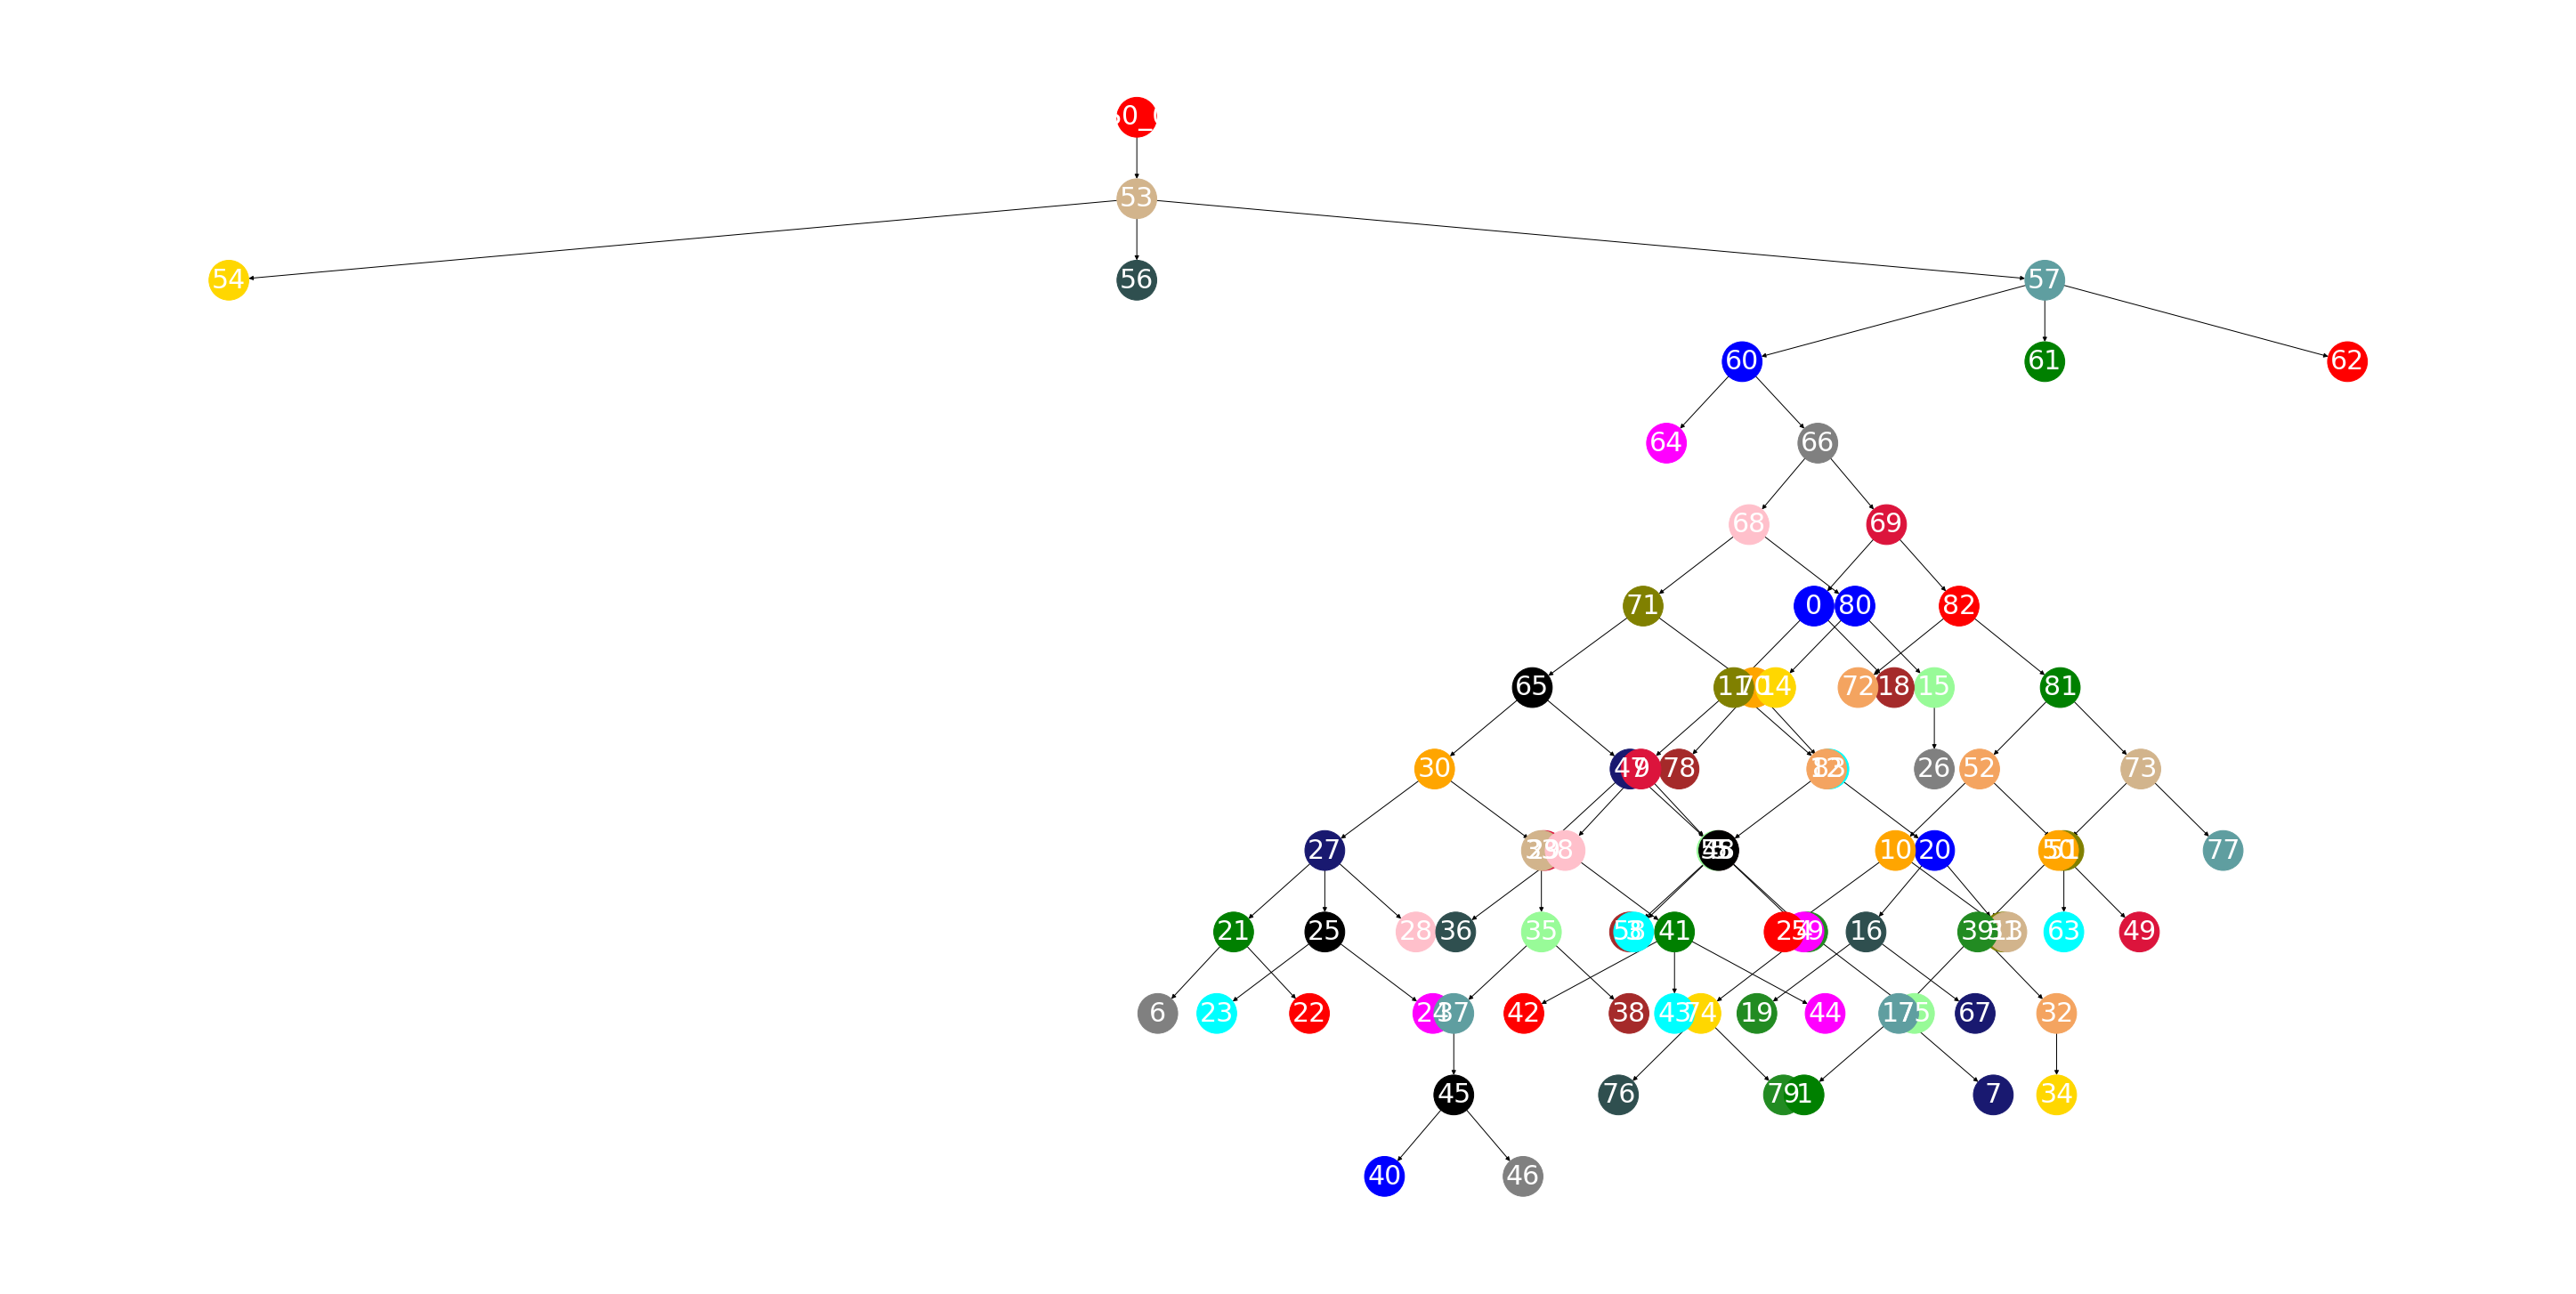

In [14]:
nviz.visualize_neuron_specific_limb(filt_neuron,
               filt_neuron.axon_limb_idx)

# Low Branch Function

limb_name = L4
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


No limb name was given so using L4 because was the limb in the first key


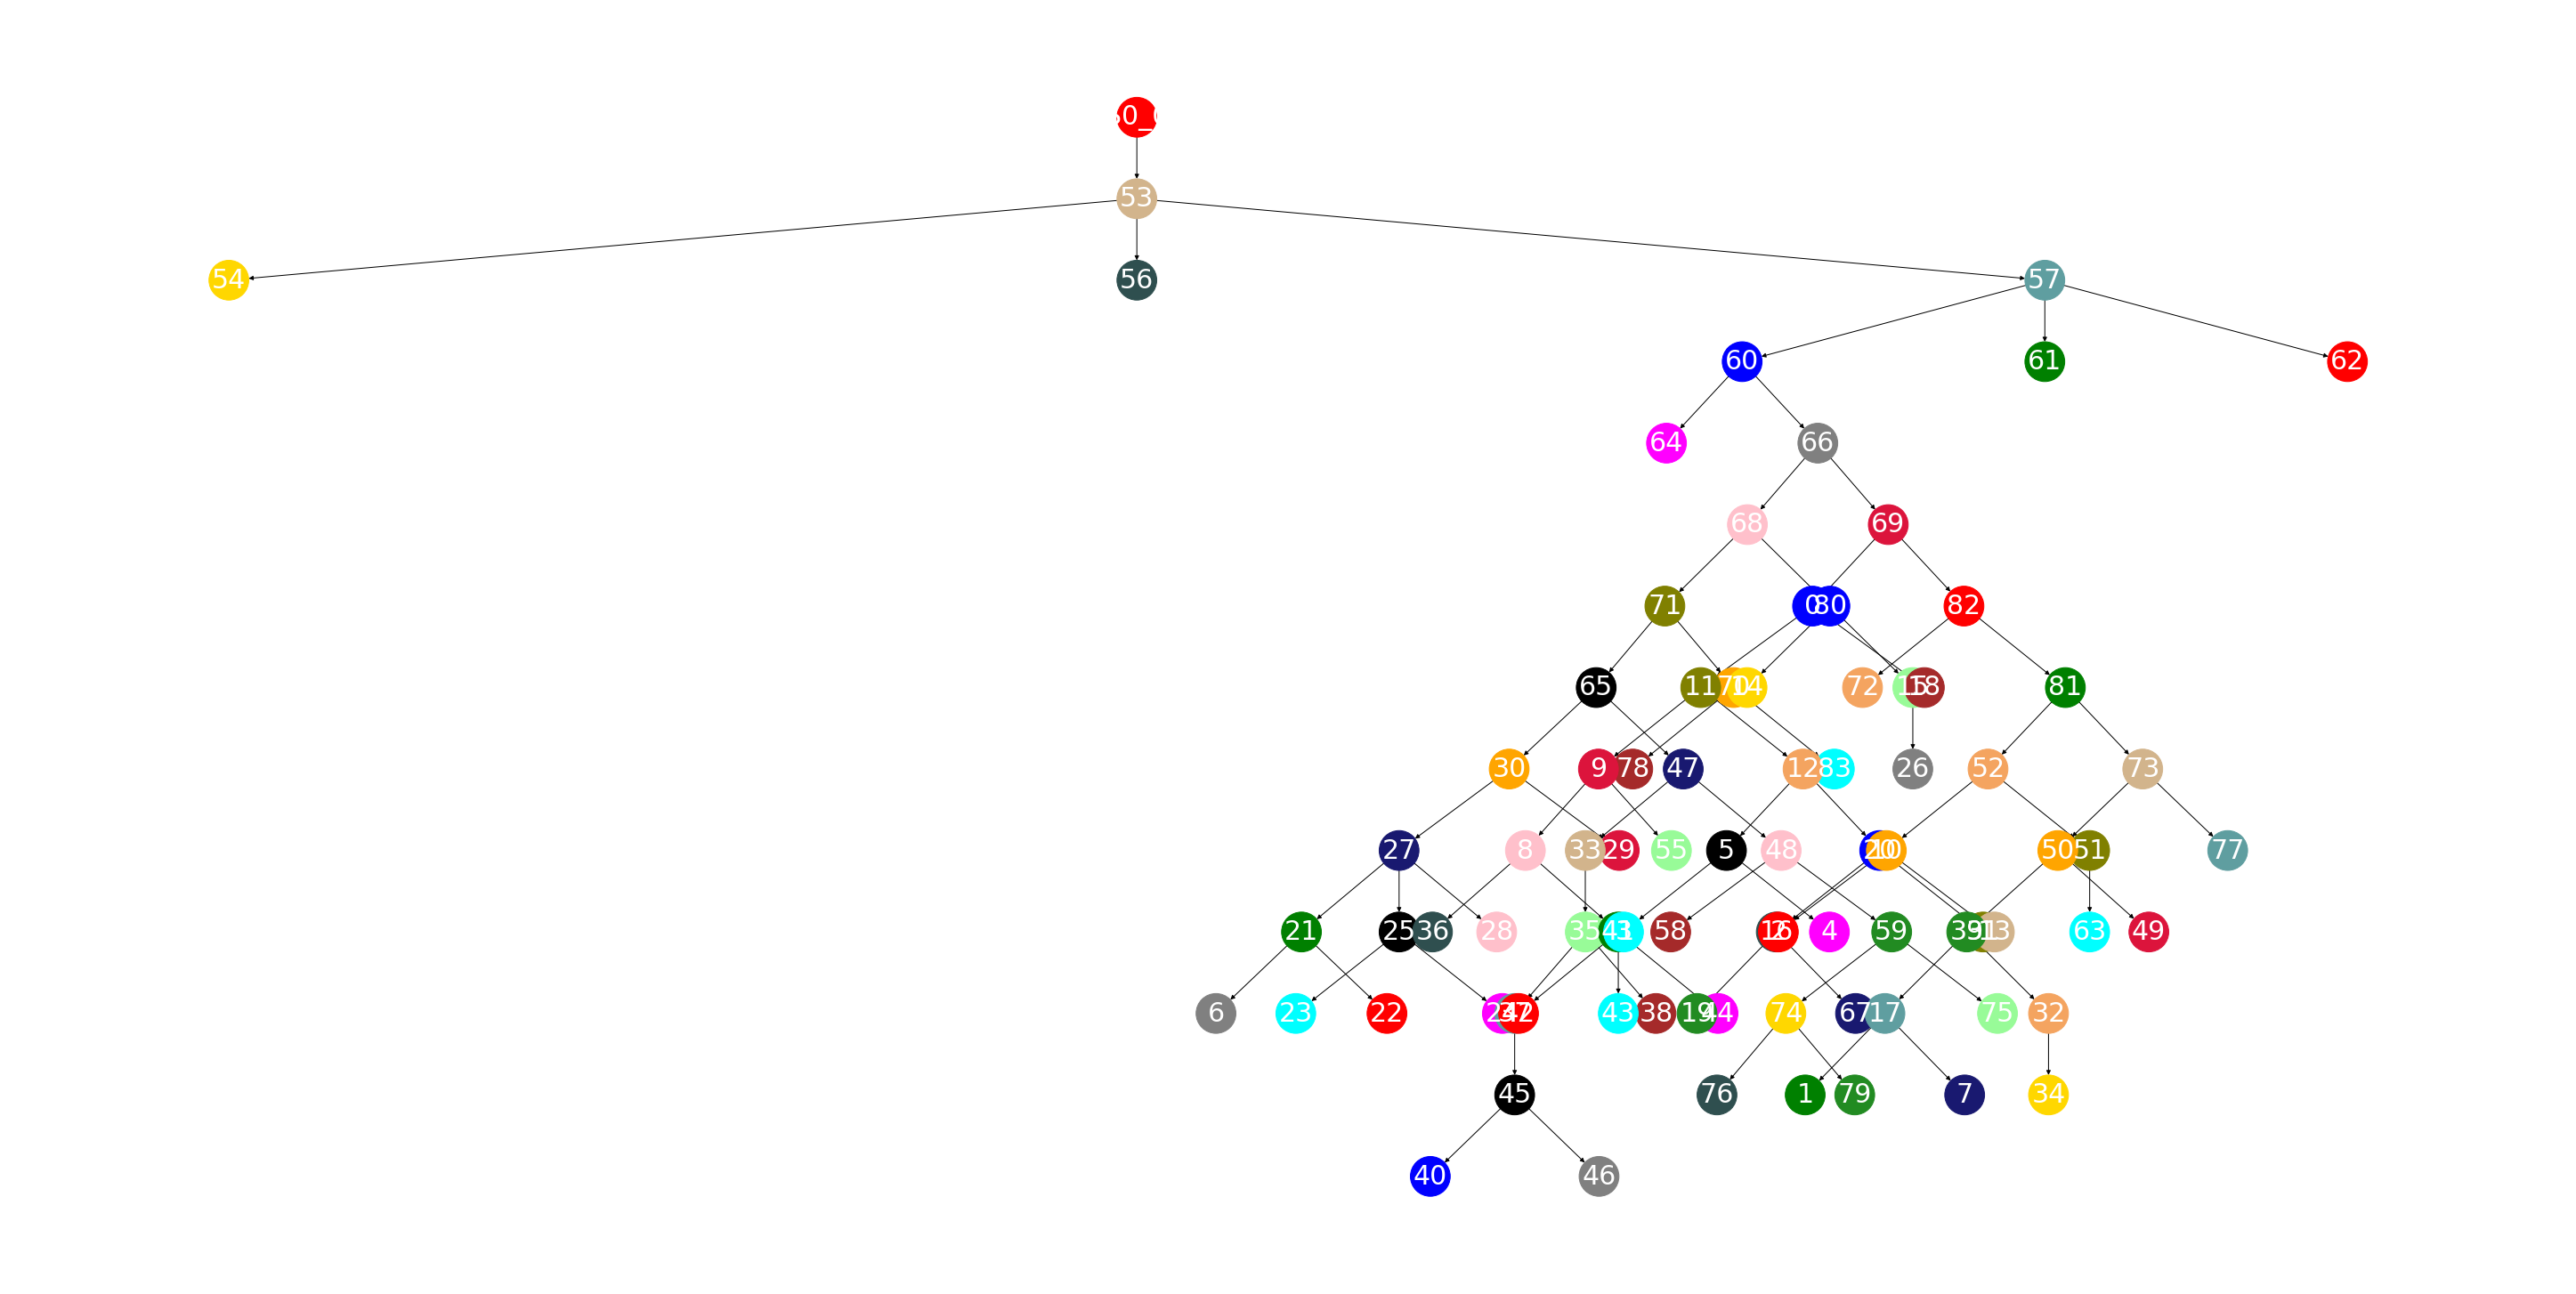

In [103]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   filt_neuron.axon_limb_name)

In [118]:
import error_detection as ed
def low_degree_upstream_match(
    limb_obj,
    branch_idx,
    
    #--- Phase A: arguments for determining downstream nodes ------
    skip_distance = 0,#3000,
    min_upstream_skeletal_distance = 2000,
    remove_short_thick_endnodes = True,
    short_thick_endnodes_to_remove = None,
    axon_spines = None,
    
    
    min_degree_to_resolve = 3,
    max_degree_to_resolve_wide = 3,
    
    # helps determine the max degrees to resolve
    width_func = au.axon_width,
    max_degree_to_resolve = 3,
    #max_width_to_resolve = None,
    
    # parameter checking to see if high degree resolve can be used
    width_max = 170,
    axon_dependent = True,
    
    plot_starting_branches = False,

    # --- Phase B.1: parameters for local edge attributes ------
    offset=1500,
    comparison_distance = 2000,
    plot_extracted_skeletons = False,
    
    
    # --- Phase B.2: parameters for local edge query ------
    
    worst_case_sk_angle_match_threshold = 65,
    
    width_diff_max = 75,#np.inf,100,
    width_diff_perc = 0.60,
    
    perform_synapse_filter = True,
    synapse_density_diff_threshold = 0.00015, #was 0.00021
    n_synapses_diff_threshold = 6,
    
    plot_G_local_edge = False,
    
    verbose = False,
    ):
    """
    Purpose: To Determine if branches downstream from a certain
    branch should be errored out based on forking rules
    """
#     if branch_idx == 13:
#         verbose = True

    if remove_short_thick_endnodes:
        if short_thick_endnodes_to_remove is None:
            short_thick_endnodes_to_remove = au.short_thick_branches_from_limb(limb_obj,
                                 verbose = False)
            
            
    # ---------- Phase A: Figure out if branch needs to be processed at all (and if so compute the downstream branches ---
    (return_value,
    downstream_branches,
    skip_distance,
    skipped_nodes) = ed.high_low_degree_upstream_match_preprocessing(
                        limb_obj,
                        branch_idx,

                        #arguments for determining downstream nodes
                        skip_distance = skip_distance,
                        min_upstream_skeletal_distance = min_upstream_skeletal_distance,
                        short_thick_endnodes_to_remove = short_thick_endnodes_to_remove,
                        axon_spines = axon_spines,
                        min_degree_to_resolve = min_degree_to_resolve,

                        # helps determine the max degrees to resolve
                        width_func = width_func,
                        max_degree_to_resolve = max_degree_to_resolve,
                        max_degree_to_resolve_wide = None,
                        max_degree_to_resolve_width_threshold = None,

                        # parameter checking to see if high degree resolve can be used
                        width_max = width_max,
                        axon_dependent = axon_dependent, 

                        #arguments for what to return
                        return_skip_info=True,
        
                        verbose=verbose,
                        )
    
    if len(return_value) > 0:
        return return_value
    
    # ---------- Phase B: Start the filtering of downstream branches for the match ----
    
    if verbose:
        print(f"***Branch being considered after filters = {branch_idx}***")
    
    #1) Compute features of a complete graph that connets all upsream and downsream edges
    #(slightly different computation for upstream than downstream edges)
    
    upstream_branch = branch_idx
    all_branch_idx = np.hstack([downstream_branches,[upstream_branch]])
    
    G = xu.complete_graph_from_node_ids(all_branch_idx)
    
    if plot_starting_branches:
        if plot_final_branch_matches:
            nviz.plot_branch_groupings(limb_obj = limb_obj,
            groupings = [[k] for k in G.nodes],
            verbose = False,
            plot_meshes = True,
            plot_skeletons = True,
            extra_group = skipped_nodes)
    
#     nodes_to_compute = [upstream_branch]
#     edge_functions = dict(sk_angle=dict(function=nst.parent_child_sk_angle,
#                                         arguments=dict(offset=offset,
#                                                       comparison_distance=comparison_distance,
#                                                       plot_extracted_skeletons=plot_extracted_skeletons)),
#                          width_diff = nst.width_diff,
#                           width_diff_percentage = nst.width_diff_percentage,
#                          synapse_density_diff=nst.synapse_density_diff,
#                           n_synapses_diff = nst.n_synapses_diff,
#                           none_to_some_synapses = nst.none_to_some_synapses
#                          )

#     G_e_1 = nst.compute_edge_attributes_locally(G,
#                                               limb_obj,
#                                              nodes_to_compute,
#                                              edge_functions,
#                                              verbose=False,
#                                              directional = False)
    
#     nodes_to_compute = downstream_branches
#     edge_functions = dict(
#                           sk_angle=dict(function=nst.sibling_sk_angle,
#                                         arguments=dict(offset=offset,
#                                                       comparison_distance=comparison_distance,
#                                                 plot_extracted_skeletons=plot_extracted_skeletons)),
#                          width_diff = nst.width_diff,
#                           width_diff_percentage = nst.width_diff_percentage,
#                          synapse_density_diff=nst.synapse_density_diff,
#                           n_synapses_diff = nst.n_synapses_diff,
#                          none_to_some_synapses = nst.none_to_some_synapses)

#     G_e_2 = nst.compute_edge_attributes_locally(G_e_1,
#                                               limb_obj,
#                                              nodes_to_compute,
#                                              edge_functions,
#                                              verbose=False,
#                                              directional = False)
        
        
#     #2) Filter the edges by local properties
#     synapse_query = (f"((synapse_density_diff<{synapse_density_diff_threshold}) or" 
#                         f" (n_synapses_diff < {n_synapses_diff_threshold}))")

#     branch_match_query = (f"(((width_diff < {width_diff_max}) or (width_diff_percentage < {width_diff_perc}))"
#                           f" and (sk_angle < {worst_case_sk_angle_match_threshold}))")

#     if perform_synapse_filter:
#         branch_match_query += f"and {synapse_query}"

#     if verbose:
#         print(f"branch_match_query = :\n{branch_match_query}")

#     G_edge_filt = xu.query_to_subgraph(G_e_2,
#                                       edge_query=branch_match_query,
#                                       verbose=verbose)
#     if plot_G_local_edge:
#         print(f"\n--- Before Local Query ---")
#         print(xu.edge_df(G_e_2))
#         print("Afer Local query: ")
#         print(xu.edge_df(G_edge_filt))
#         nx.draw(G_edge_filt,with_labels=True) 
#         plt.show()
    
    
#     G = G_edge_filt

In [109]:
axon_spines_limb_branch_dict = au.axon_spines_limb_branch_dict(filt_neuron)
short_thick_endnodes_to_remove_limb_branch = au.short_thick_branches_limb_branch_dict(filt_neuron)


'L4'

In [127]:
ax_name = filt_neuron.axon_limb_name       
axon_spines = axon_spines_limb_branch_dict[ax_name]
short_thick_endnodes_to_remove = short_thick_endnodes_to_remove_limb_branch[ax_name]
nodes_to_exclude = list(axon_spines) + list(short_thick_endnodes_to_remove)
print(f"nodes_to_exclude = {nodes_to_exclude}")

nodes_to_exclude = [4, 7, 19, 34, 38, 42, 43, 4, 7, 22, 28, 34, 38, 43, 54, 56, 61, 62, 64]


In [120]:
low_degree_upstream_match(
    limb_obj=filt_neuron[ax_name],
    branch_idx=45,
    filters_to_run = None, # provides a list of all the checks you want to run
    
    #--- Phase A: arguments for determining downstream nodes ------
    skip_distance = 0,#3000,
    min_upstream_skeletal_distance = 2000,
    remove_short_thick_endnodes = True,
    short_thick_endnodes_to_remove = short_thick_endnodes_to_remove,
    axon_spines = axon_spines,
    min_degree_to_resolve = 3,
    max_degree_to_resolve_wide = 3,
    
    # helps determine the max degrees to resolve
    width_func = au.axon_width,
    max_degree_to_resolve = 3,
    #max_width_to_resolve = None,
    
    # parameter checking to see if high degree resolve can be used
    width_max = 170,
    axon_dependent = True,
    
    plot_starting_branches = False,
    plot_extracted_skeletons = False,
    
    plot_G_local_edge = False,
    verbose = True,
    )

Skipping because skeletal length (1587.667234738914) was less than min_upstream_skeletal_distance = 2000


[None, array([], dtype=float64)]

In [125]:
nru.upstream_node(filt_neuron[4],45)

37

# Creating the Upstream and Downstream Features

In [128]:
limb_obj = filt_neuron[4]

In [139]:
skeletal_length_upstream(limb_obj,45),skeletal_length_downstream(limb_obj,45)
skeletal_length_upstream(limb_obj,37),skeletal_length_downstream(limb_obj,37)
width_upstream(limb_obj,37),width_downstream(limb_obj,37)

(46.75778630202137, 49.10864653122098)

In [143]:
import neuron_statistics as nst
import skeleton_utils as sk
[sk.calculate_skeleton_distance(k) for k in [nst.skeleton_downstream(limb_obj,45),
                                           nst.skeleton_upstream(limb_obj,45)]]

[1587.667234738914, 9312.03064459342]

In [145]:
[len(k) for k in [nst.synapses_downstream(limb_obj,45),
                                           nst.synapses_upstream(limb_obj,45)]]

[0, 0]

In [126]:
nviz.visualize_branch_at_downstream_split(filt_neuron,
                                         4,37)

# of downstream targets = 1
Recieved another instance of Neuron class in init -- so just copying data

 Working on visualization type: mesh

 Working on visualization type: skeleton
No Synapses to plot


downstream_branches = [45]
downstream_branches[0] = 45
web_size_faces:42
web_size_volume:29690839.785172302
web_size_skeleton:774.9131141792095
web_size_ray_trace_percentile:179.81810466967997
web_bbox_ratios_max:1.3600447347389262
web_bbox_ratios_min:1.0848957966046078
web_volume_ratio:2.3597359912110365
web_cdf:0.42967849999999996
parent_n_large_boutons:0
parent_n_boutons:1
parent_no_bouton_median:46.75778630202137
parent_no_spine_median_mesh_center:49.87679214502312
child_no_bouton_median_min:60.54611802322274
child_no_bouton_median_diff_min:13.788331721201367
child_no_spine_median_mesh_center_min:60.54611802322274
child_no_spine_median_mesh_center_diff_min:10.669325878199622
child_angle_min:29.31
child_n_boutons_min:0
child_n_large_boutons_min:0
child_no_bouton_median_max:60.54611802322274
child_no_bouton_median_diff_max:13.788331721201367
child_no_spine_median_mesh_center_max:60.54611802322274
child_no_spine_median_mesh_center_diff_max:10.669325878199622
child_angle_max:29.31
chil

In [121]:
[k for k in dir(nviz) if "downstream" in k]

['visualize_branch_at_downstream_split']

In [123]:
ax_name

'L4'